In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('housingdata.csv')
data.head()

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [3]:
housing_colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data.columns = housing_colnames
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


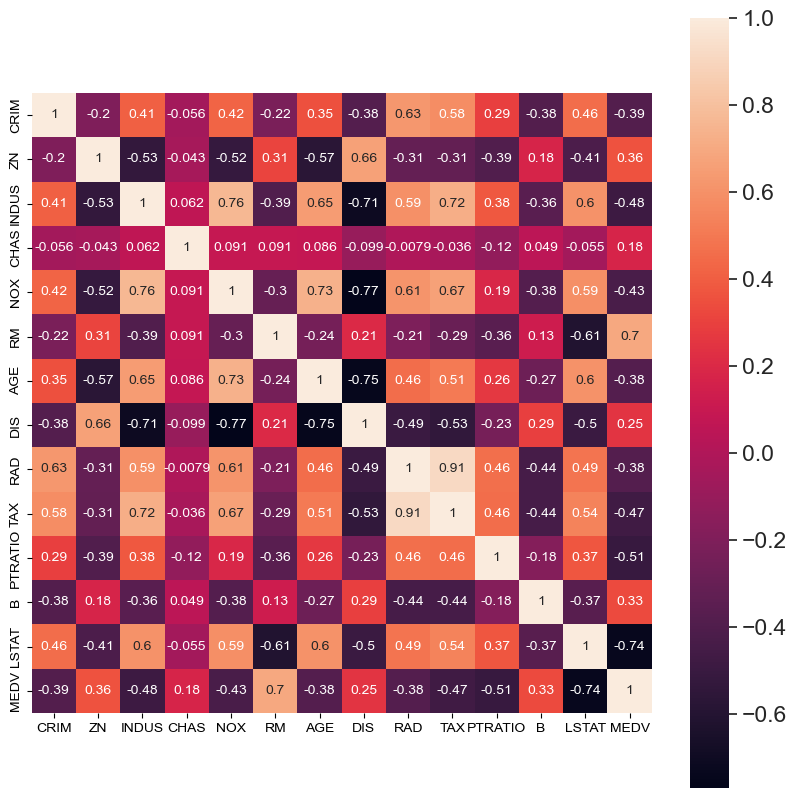

In [4]:
import seaborn as sns
fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(data.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

In [5]:
x=data[['RM','DIS','B']].values
y=data['MEDV'].values

In [6]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x = min_max_scaler.fit_transform(x)

In [7]:
train_x,test_x=x[:int((len(x))*.75)],x[int((len(x))*.75)+1:]
train_y,test_y=y[:int((y.size)*.75)],y[int((y.size)*.75)+1:]

In [8]:
def fit_multipleLinearRegression(x,y,num_iter=10000,alpha=0.01):
    
    import numpy as np

    # Adding x0=1 column to x array.
    X_New = np.c_[np.ones(len(x)),x]

    # Convert y from 1d to 2d array.
    y = y.reshape(len(y), 1)


    # Number of Training samples.
    n = len(x)

    # Initializing Theta.
    weights = np.zeros((X_New.shape[1], 1),dtype = float)
    
    #List for tracking the losses 
    loss_list=[]
    
    for i in range(num_iter):

        #Calculating the derivative of the cost function 
        gradients = (1/n) * X_New.T.dot(X_New.dot(weights)- y)
        
        #Updating the coefficients
        weights = weights - alpha * gradients

        #Caculating the loss of the loss function
        loss=(1/(2*n))*np.sum(np.square(X_New@weights - y))
        loss_list.append(loss.reshape(-1))
        
        

    return weights, loss_list

In [9]:
m,loss=fit_multipleLinearRegression(train_x,train_y,10000)

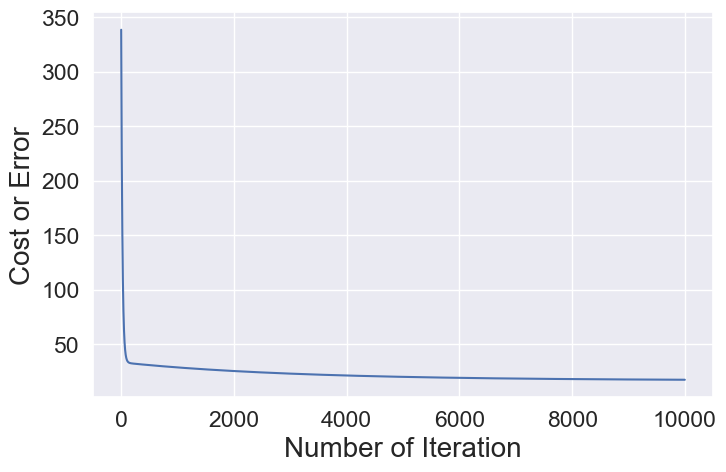

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(np.arange(0,len(loss)),loss) 
plt.xlabel('Number of Iteration',fontsize=20)
plt.ylabel('Cost or Error',fontsize=20)
plt.show() 

In [11]:
def predict(x,m):
    predicted= np.c_[np.ones(len(x)),x] @ m
    return predicted

In [12]:
y_predict=predict(test_x,m)

In [13]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
trained=regr.fit(train_x, train_y)

In [14]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true=test_y,y_pred=y_predict)
print('Our model MSE value is ',mse1)

mse2=mean_squared_error(y_true=test_y,y_pred=trained.predict(test_x))
print('Scikit-learn model MSE value is ',mse2)

Our model MSE value is  83.18282910837165
Scikit-learn model MSE value is  83.62240290459192


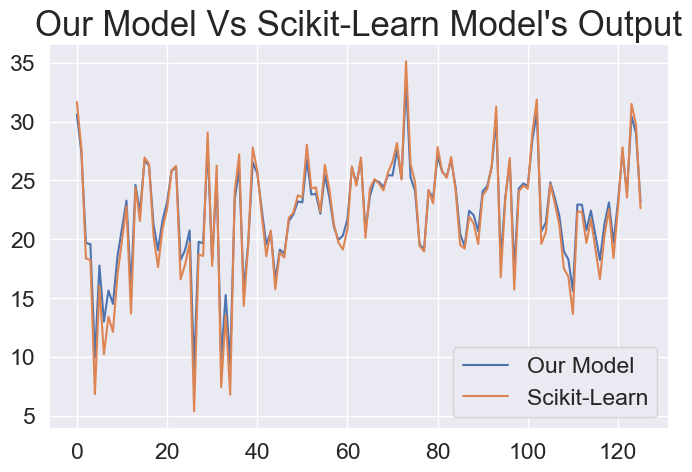

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_predict, label='Our Model') 
plt.plot(trained.predict(test_x), label='Scikit-Learn')
plt.legend(loc="lower right")
plt.title("Our Model Vs Scikit-Learn Model's Output", fontsize=25)
plt.show() 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87efde85-a815-4ac6-9936-9818d283592d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>